In [52]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df.iloc[:,3:13].values

In [7]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [8]:
y = df.iloc[:,13].values

In [9]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [10]:
from sklearn.preprocessing import Imputer

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [12]:
labelencoder_X_1 = LabelEncoder()

In [13]:
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])

In [14]:
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [15]:
labelencoder_X_2 = LabelEncoder()

In [16]:
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])

In [17]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [18]:
onehotencoder = OneHotEncoder(categorical_features = [1])

In [19]:
X = onehotencoder.fit_transform(X).toarray()

In [20]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [21]:
X = X[:,1:]

In [22]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [29]:
#_init_ ANN

In [30]:
classifier = Sequential()

In [34]:
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim = 11))

In [35]:
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))

In [36]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [37]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
classifier.fit(X_train,y_train,batch_size=10,nb_epoch = 100)

Epoch 1/100
2360/8000 [=======>......................] - ETA: 0s - loss: 0.3885 - acc: 0.8394

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


8000/8000 [==============================] - 0s 61us/step - loss: 0.3976 - acc: 0.8364
Epoch 2/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.3977 - acc: 0.8381
Epoch 3/100
8000/8000 [==============================] - 1s 64us/step - loss: 0.3983 - acc: 0.8339
Epoch 4/100
8000/8000 [==============================] - 0s 61us/step - loss: 0.3978 - acc: 0.8357
Epoch 5/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.3977 - acc: 0.8349
Epoch 6/100
8000/8000 [==============================] - 0s 61us/step - loss: 0.3980 - acc: 0.8359
Epoch 7/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.3977 - acc: 0.8356
Epoch 8/100
8000/8000 [==============================] - 0s 61us/step - loss: 0.3976 - acc: 0.8366
Epoch 9/100
8000/8000 [==============================] - 0s 61us/step - loss: 0.3978 - acc: 0.8354
Epoch 10/100
8000/8000 [==============================] - 0s 58us/step - loss: 0.3977 - acc: 0.8346
Epoch 11/100
8000/800

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
df.corr()['Exited']

RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

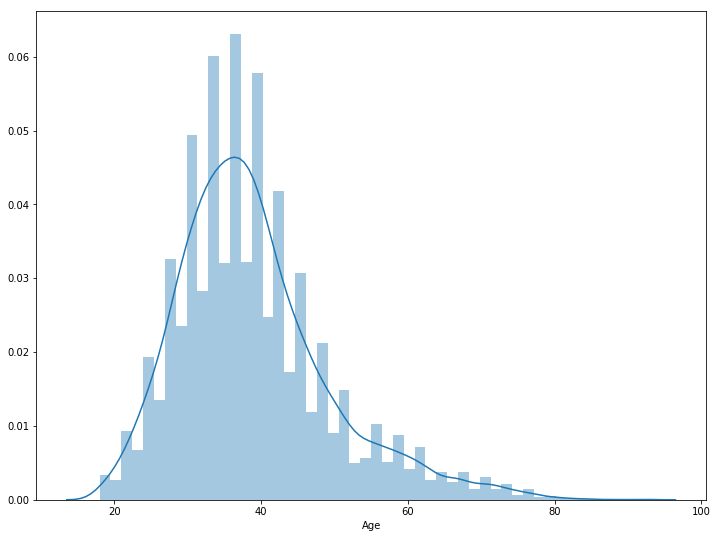

In [56]:
plt.figure(figsize=(12,9))
sns.distplot(df['Age'])

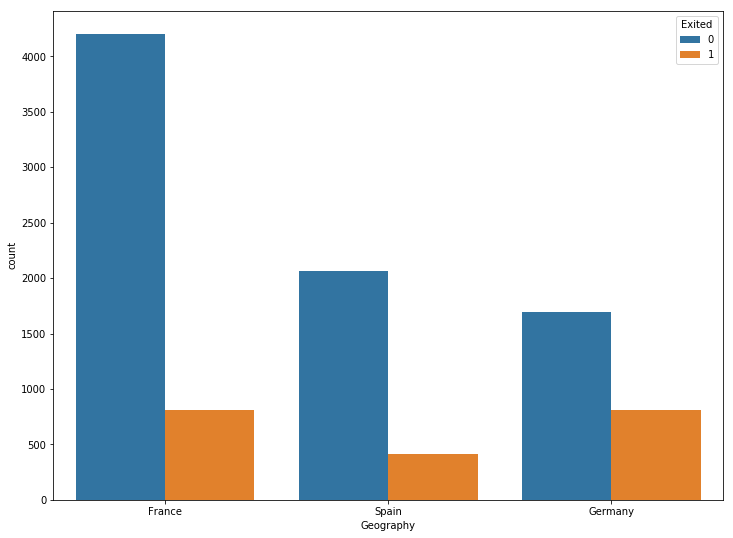

In [64]:
plt.figure(figsize=(12,9))
sns.countplot(x='Geography',hue='Exited',data=df)

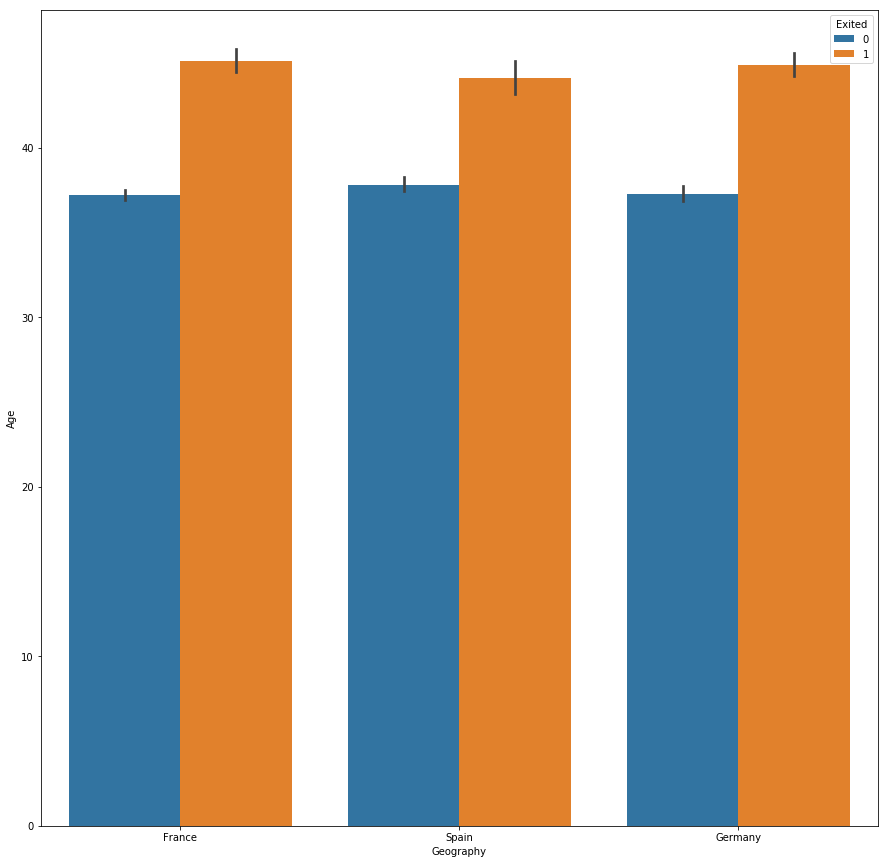

In [71]:
plt.figure(figsize=(15,15))
sns.barplot(x='Geography',y='Age',hue='Exited',data=df)

In [69]:
df['Age'].max()

92

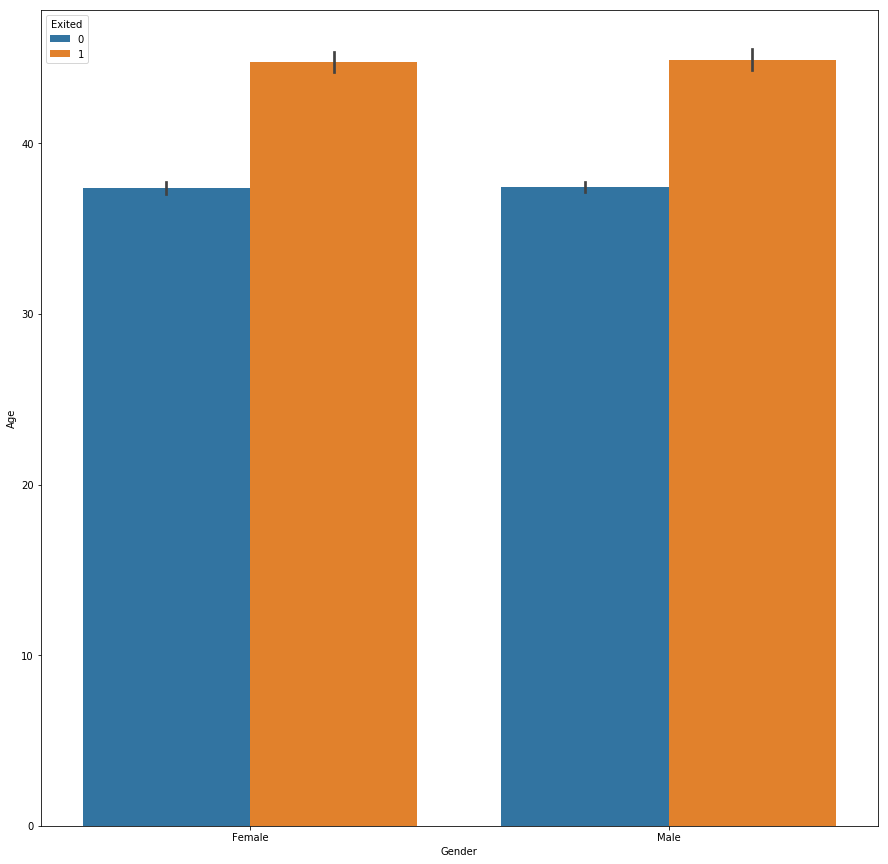

In [72]:
plt.figure(figsize=(15,15))
sns.barplot(x='Gender',y='Age',hue='Exited',data=df)

In [78]:
df['CreditScore'].corr(df['Exited'])

-0.02709353975465779

In [79]:
df['Age'].corr(df['Exited'])

0.28532303783506835